# Review of Credit Card Fraud Detection

### Importing libraries

In [190]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression
import warnings 
warnings.filterwarnings('ignore') 
%matplotlib inline 


### Reading data

In [192]:
data = pd.read_csv(r'C:\Users\bkt29\OneDrive\Desktop\MLE_AI\datasets\creditcard.csv') 

### Data Exploration

In [194]:
data.head() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [195]:
data.tail() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [196]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [197]:
data.isnull().sum() 

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

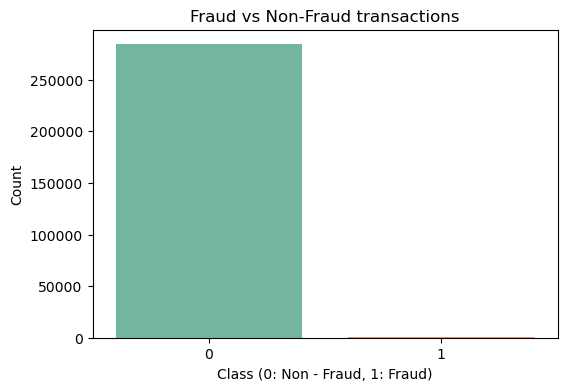

In [198]:
#checking balance of data
plt.figure(figsize = (6,4)) 
sns.countplot(data = data, x = 'Class', palette = 'Set2') 
plt.title('Fraud vs Non-Fraud transactions') 
plt.xlabel('Class (0: Non - Fraud, 1: Fraud)') 
plt.ylabel('Count') 
plt.show() 

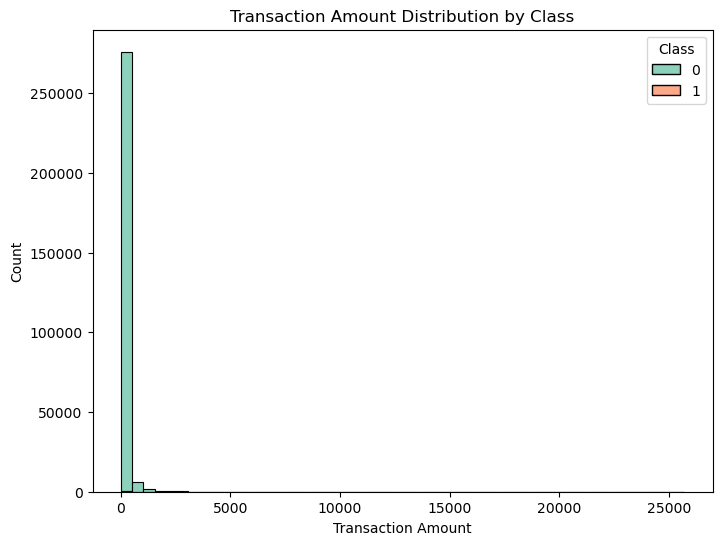

In [199]:
#Showing 'Transaction Amount' distribution
plt.figure(figsize = (8,6)) 
sns.histplot(data = data, x = 'Amount', hue = 'Class', multiple = 'stack', palette = 'Set2', bins = 50) 
plt.title('Transaction Amount Distribution by Class') 
plt.xlabel('Transaction Amount') 
plt.ylabel('Count') 
plt.show() 

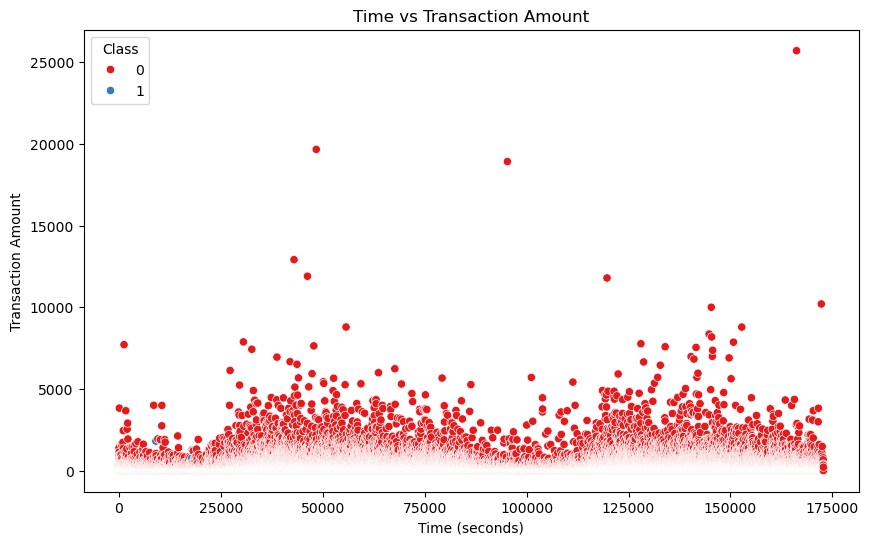

In [200]:
#Scatter Plot to show distribution of Transaction Amount with Time. 
plt.figure(figsize = (10,6)) 
sns.scatterplot(data = data, x = 'Time', y = 'Amount', hue = 'Class', palette = 'Set1') 
plt.title('Time vs Transaction Amount') 
plt.xlabel('Time (seconds)') 
plt.ylabel('Transaction Amount') 
plt.show() 

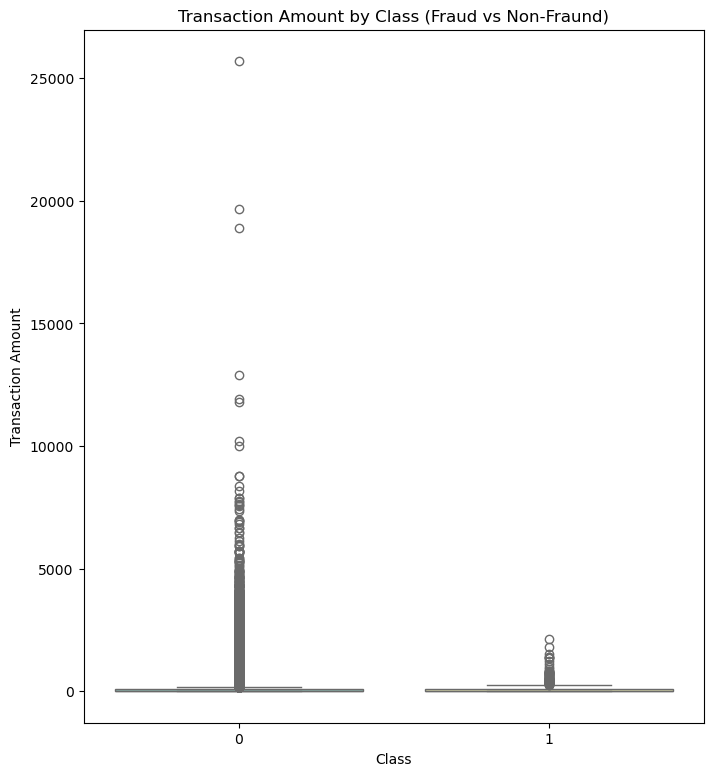

In [201]:
#Distrubiotn of Transaction Amount with Class 
plt.figure(figsize=(8,9)) 
sns.boxplot(data = data, x = 'Class', y = 'Amount', palette = 'Set3') 
plt.title('Transaction Amount by Class (Fraud vs Non-Fraund)') 
plt.xlabel('Class') 
plt.ylabel('Transaction Amount') 
plt.show() 

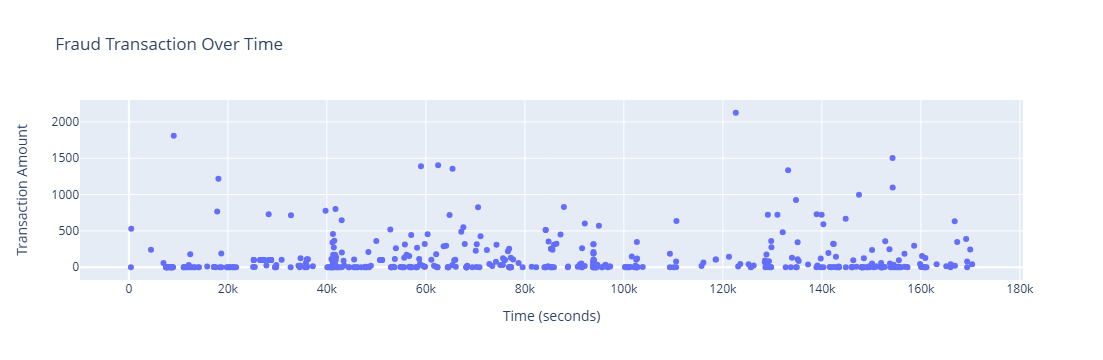

In [202]:
#Showing Transaction Amount for fraud transactions.
fraud = data[data['Class'] == 1] 
fig = px.scatter(fraud, x = 'Time', y = 'Amount', title = 'Fraud Transaction Over Time', labels = {'Time': 'Time (seconds)', 'Amount':'Transaction Amount'}) 
fig.show() 

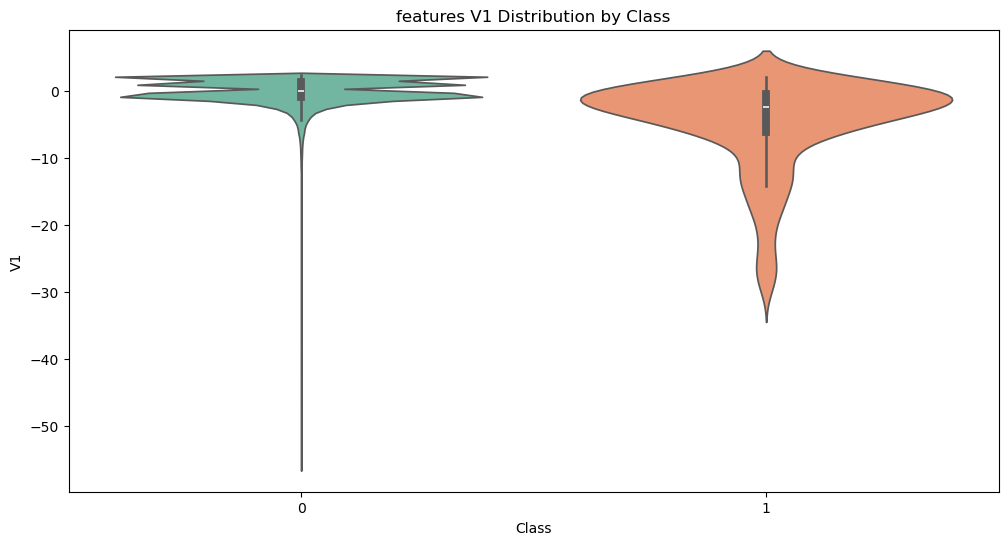

In [203]:
plt.figure(figsize = (12,6)) 
sns.violinplot(data = data, x = 'Class', y = 'V1', palette = 'Set2') 
plt.title('features V1 Distribution by Class') 
plt.show() 

### Data Preprocessing 

In [205]:
#Highlighting the imbalance
data['Class'].value_counts() 

Class
0    284315
1       492
Name: count, dtype: int64

In [206]:
legit = data[data.Class == 0] 
Fraud = data[data.Class == 1] 
Fraud.shape

(492, 31)

In [207]:
legit.describe() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,...,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.0
mean,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022,0.0
std,47484.015786,1.929814,1.636146,1.459429,1.399333,1.356952,1.329913,1.178812,1.161283,1.089372,...,0.716743,0.723668,0.621541,0.605776,0.520673,0.482241,0.399847,0.329570,250.105092,0.0
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,54230.000000,-0.917544,-0.599473,-0.884541,-0.850077,-0.689398,-0.766847,-0.551442,-0.208633,-0.640412,...,-0.228509,-0.542403,-0.161702,-0.354425,-0.317145,-0.327074,-0.070852,-0.052950,5.650000,0.0
50%,84711.000000,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,...,-0.029821,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199,22.000000,0.0
75%,139333.000000,1.316218,0.800446,1.028372,0.737624,0.612181,0.399619,0.571019,0.326200,0.598230,...,0.185626,0.528407,0.147522,0.439869,0.350594,0.240671,0.090573,0.077962,77.050000,0.0
max,172792.000000,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,...,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,0.0


In [208]:
Fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,...,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,...,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,...,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,...,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


In [209]:
data.columns 

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [210]:
data.groupby('Class').mean() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [211]:
#taking only 492 legitimate transactions randomly from data
legit_sample = legit.sample(n=492)
new_dataset = pd.concat([legit_sample, fraud], axis = 0) 
new_dataset.head() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
13938,24723.0,-0.278243,1.495082,0.752260,1.122241,0.843412,-0.492534,0.688423,-0.099742,0.261844,...,-0.062570,0.112860,-0.272563,-0.184742,-0.170854,-0.354526,0.154642,0.172335,1.00,0
220342,142126.0,2.169862,-0.503173,-1.919391,-0.839595,-0.057221,-0.888168,-0.317826,-0.159341,-0.719469,...,0.002758,-0.046020,0.204822,0.653076,-0.047067,-0.332791,-0.037986,-0.039558,15.00,0
178873,123823.0,1.454700,-1.382414,-0.818564,0.316899,-0.765423,-0.029929,-0.271318,-0.071703,1.407521,...,0.342938,0.570830,-0.116607,0.648201,-0.213181,0.068852,-0.040737,0.015058,300.00,0
205965,136003.0,-0.007154,0.721631,0.323379,-0.666021,0.293461,-0.880019,0.831917,0.006894,-0.113543,...,-0.216837,-0.548729,0.088491,0.034532,-0.575371,0.119364,0.234360,0.085455,5.16,0
234497,148001.0,-0.891886,-0.610313,0.662033,-1.863311,-0.556009,-1.241502,-0.764480,0.478702,-0.500399,...,0.408486,0.836260,-0.126905,0.058079,0.199932,-0.164783,0.100477,-0.165691,24.99,0


In [212]:
new_dataset.tail() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [213]:
new_dataset['Class'].value_counts() 

Class
0    492
1    492
Name: count, dtype: int64

In [214]:
new_dataset.groupby('Class').mean() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,96275.189024,0.126458,0.071120,-0.018884,0.021195,-0.071374,-0.057527,0.010478,0.000520,-0.042794,...,0.031967,-0.006072,0.048527,0.011252,0.027132,0.008907,0.025875,0.006751,0.007896,83.598638
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


### Model Creation 

In [216]:
#Splitting data
X = new_dataset.drop(columns = 'Class', axis = 1) 
Y = new_dataset['Class']
X 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
13938,24723.0,-0.278243,1.495082,0.752260,1.122241,0.843412,-0.492534,0.688423,-0.099742,0.261844,...,0.041035,-0.062570,0.112860,-0.272563,-0.184742,-0.170854,-0.354526,0.154642,0.172335,1.00
220342,142126.0,2.169862,-0.503173,-1.919391,-0.839595,-0.057221,-0.888168,-0.317826,-0.159341,-0.719469,...,-0.007226,0.002758,-0.046020,0.204822,0.653076,-0.047067,-0.332791,-0.037986,-0.039558,15.00
178873,123823.0,1.454700,-1.382414,-0.818564,0.316899,-0.765423,-0.029929,-0.271318,-0.071703,1.407521,...,0.456371,0.342938,0.570830,-0.116607,0.648201,-0.213181,0.068852,-0.040737,0.015058,300.00
205965,136003.0,-0.007154,0.721631,0.323379,-0.666021,0.293461,-0.880019,0.831917,0.006894,-0.113543,...,-0.110942,-0.216837,-0.548729,0.088491,0.034532,-0.575371,0.119364,0.234360,0.085455,5.16
234497,148001.0,-0.891886,-0.610313,0.662033,-1.863311,-0.556009,-1.241502,-0.764480,0.478702,-0.500399,...,0.193646,0.408486,0.836260,-0.126905,0.058079,0.199932,-0.164783,0.100477,-0.165691,24.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [217]:
Y

13938     0
220342    0
178873    0
205965    0
234497    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

In [218]:
#splitting data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 2) 
print(X.shape, X_train.shape, X_test.shape) 

(984, 30) (787, 30) (197, 30)


In [219]:
#ML Model 
model = LogisticRegression() 
model.fit(X_train, Y_train) 

LogisticRegression()

In [220]:
X_train_prediction = model.predict(X_train) 
training_data_accuracy = accuracy_score(X_train_prediction, Y_train) 
print('Accuracy on Training data: ', training_data_accuracy) 

Accuracy on Training data:  0.9440914866581956


In [221]:
X_test_prediction = model.predict(X_test) 
test_data_accuracy = accuracy_score(X_test_prediction, Y_test) 
print('Accuracy score on Test Data: ', test_data_accuracy) 

Accuracy score on Test Data:  0.9187817258883249
